In [5]:
import tensorflow as tf

# Tensorflow : 다른 package, module에 비해서 살짝 특이한 형태의 library
# 다른 라이브러리와 다르게 ! 한 ! 방 ! 에 ! 수행된다.
# Tensorflow는 3가지 구성요소로 이해하면 쉽다
# 1. Node : 수학적인 연산을 담당, 데이터의 입출력을 담당
# 2. edge : 동적 데이터를 node로 실어 나르는 역할
# 3. Tensor : 다차원배열형태의 동적 데이터


# constant : 상수 node를 만든다
node1 = tf.constant("Hello World !")
print(node1)
# 결과 : Tensor("Const:0", shape=(), dtype=string)
# tensorflow로 만든 graph를 실행시키기 위해서는 runner가 필요하다
# session이라고 불리는 runner를 생성한다
# tensorflow를 실행시켜줄 주체 : sess
sess = tf.Session()
# 어떤 node를 실행할 것인가
print(sess.run(node1))
# 결과 : b'Hello World !'
# 여기에서 b는 byte string이라는 것을 알려준다
# 없애려면?
print(sess.run(node1).decode())
# 결과 : Hello World !


Tensor("Const_2:0", shape=(), dtype=string)
b'Hello World !'
Hello World !


In [17]:
import tensorflow as tf
# 2개의 값을 더하는 tensorflow graph를 생성하고 실행시켜서 값을 구해보자

# 실수를 갖고있는 값을 생성
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
# 연산처리하는 node 생성
node3 = node1 + node2

# 그래프를 실행시키기 위한 곳 !
sess = tf.Session()
print(sess.run(node3))
# 결과 : 30.0

# 여러개 실행시키고 싶으면??
print(sess.run([node1,node2]))
# 결과 : [10.0, 20.0]

# constant이기 때문에 실행시키는 시점에 이미 각 노드의 값이 결정되어 있다.
# 만약 실행시키는 시점에 각 노드의 값을 결정해서 실행시키려면 어떻게 해야하나요?
# 
node1 = tf.placeholder(dtype = tf.float32)
node2 = tf.placeholder(dtype = tf.float32)

node3 = node1 + node2
sess = tf.Session()
result = sess.run(node3, feed_dict = {node1 :  10, node2 : 30} )
print( "덧셈결과 : {}".format(result))



30.0
[10.0, 20.0]
덧셈결과 : 40.0


In [25]:
# 연습해보자

# 1. 필요한 module을 import
import tensorflow as tf

# 2. training data set
x_data = [1,2,3]
y_data = [1,2,3]

# 3. placeholder(tensorflow그래프에 입력을 주기 위한 parameter기능)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 4. Weight, bias 
# random_normal : 랜덤하게 실수값을 하나 지정해준다
# 현재 독립변수에 대한 내용이므로 w를 한 개만 사용한다. ( 나중엔 여러개? )
# [1,2 ] = 2차원 /////////  [1] = 1차원
# name은 이름을 써준다
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 5. Hypothesis
H = W * x + b

# 6. Cost function (Loss function)
# 가설에서 y값을 뺴고 그 값을 제곱해서 평균을 구하자
cost = tf.reduce_mean(tf.square(H-y))

# 7. train node를 생성
# GradientDescentOptimizer : 경사 하강법 + 좋은 w값으로 이동
# GradientDescentOptimizer(폭을 어떻게 설정해줄 것인가)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
# 이 optimizer는 cost에 적용되어서 최적의 cost를 찾는다.
train = optimizer.minimize(cost)


# 8. 그래프를 실행시키기 위해서 runner(session) 필요
# variable을 사용하면 학습하기 전에 반드시 초기화를 해야한다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화


# 9. learning 작업 (학습)
# train 을 계속 반복시켜준다.
for step in range(3000):
    _,w_val,cost_val,b_val = sess.run([train,W,cost,b],
                            feed_dict={
                                   x : x_data,
                                   y : y_data
                               })
    
    if step % 300 == 0:
        print("w값 : {}, b값 : {}, cost값{}".format(w_val,
                                            b_val,
                                            cost_val))
    
# 결과 : 
# w값 : [1.2609913], b값 : [-0.19128655], cost값0.1933458298444748
# w값 : [1.0548033], b값 : [-0.12458069], cost값0.002237234730273485
# w값 : [1.026621], b값 : [-0.06051587], cost값0.0005278923199512064
# w값 : [1.0129313], b값 : [-0.02939607], cost값0.00012456371041480452
# w값 : [1.0062815], b값 : [-0.01427943], cost값2.9391658245003782e-05
# w값 : [1.0030514], b값 : [-0.00693654], cost값6.9356151470856275e-06
# w값 : [1.0014826], b값 : [-0.00337], cost값1.6369949662475847e-06
# w값 : [1.0007205], b값 : [-0.0016381], cost값3.86766799920224e-07
# w값 : [1.0003511], b값 : [-0.0007972], cost값9.162806691165315e-08
# w값 : [1.000171], b값 : [-0.0003884], cost값2.1756918044957274e-08
    

    
# 학습이 끝났다 !!! => 최적의 w와 b값을 찾아내서 H를 만들었다.

# prediction
print(sess.run(H, feed_dict={ x : 200 }))
# 결과 : [200.02605]

w값 : [0.03963888], b값 : [-0.9066368], cost값10.884941101074219
w값 : [1.0866857], b값 : [-0.19705677], cost값0.005597479175776243
w값 : [1.0421084], b값 : [-0.0957219], cost값0.0013207889860495925
w값 : [1.0204545], b값 : [-0.04649775], cost값0.0003116543812211603
w값 : [1.009936], b값 : [-0.02258659], cost값7.353850378422067e-05
w값 : [1.0048265], b값 : [-0.01097184], cost값1.7352771465084516e-05
w값 : [1.0023447], b값 : [-0.00532988], cost값4.094944870303152e-06
w값 : [1.0011394], b값 : [-0.0025897], cost값9.668309530752595e-07
w값 : [1.0005543], b값 : [-0.00125933], cost값2.2866039728342002e-07
w값 : [1.0002698], b값 : [-0.00061307], cost값5.416151793724566e-08
[200.02605]


In [3]:
###### [ 오존, 태양광, 바람, 온도(화씨), 월, 일 ] 분석 : 온도와 오존과의 경향성 ######
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data loading
# 학습데이터를 확보해서 전처리 과정을 거쳐야 한다.

df = pd.read_csv("./DA/ozone.csv")
df.head()
print("읽어들인 데이터의 shape : {}".format(df.shape)) 
# 결과: 153행 6열

# 필요한 열을 먼저 가져오자
# 결측치 제거 시 다른 column에 의해서 너무 ㅁ낳은 행이 제거되는 걸 방지하기 위해 필요한 column만 추출
df = df[["Ozone","Temp"]]

# 결측치 제거 (  dropna() 이용  )
df = df.dropna(how="any", inplace = False)
print("결측치를 제거한 후 남은데이터 : {}".format(df.shape))  
# 결과 : 116행 2열





읽어들인 데이터의 shape : (153, 6)
결측치를 제거한 후 남은데이터 : (116, 2)


18.0 60.5
124.25 -45.75
이상치를 제거한 후 남은 데이터 : (114, 6)


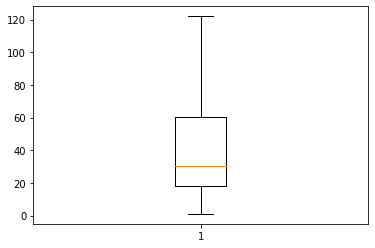

In [43]:
# 이상치 제거
# 각 column(온도와 오존)에 대해서 boxplot을 그려보자

#plt.boxplot(df["Temp"])
# 결과 : 이상치가 없다

plt.boxplot(df["Ozone"])
# 결과 : 이상치가 있다
# 이상치는 선형그래프에서 가중치를 많이 잡아먹기 때문에 꼭 지워줘야한다 !

# 이상치를 찾기 위해서 Tukey Fence 방식을 이용(IRQ방식 이용)
# IRQ값은 (3사분위 값 - 1사분위 값)을 계산해보자
# 만약 (3사분위값 + IRQ * 1.5)를 초과하는 값이 존재하면 이상치
# 만약 (1사분위값 - IRQ * 1.5) 미만의 값이 존재하면 이상치

# 1사분위
q1 = np.percentile(df["Ozone"],25)
# 3사분위
q3 = np.percentile(df["Ozone"],75)

# 동시에 구하려면?
q1,q3 = np.percentile(df["Ozone"],[25,75])
print(q1,q3)

# irq 구하기
irq = q3 - q1

# 범위 구하기
upper = q3 + irq * 1.5
lower = q1 - irq * 1.5
print(upper, lower)

#  boolean indexing의 mask 만들기
mask_upper = df["Ozone"] > upper
mask_lower = df["Ozone"] < lower

# mask를 제외한 데이터를 모두 가져오기
df = df.loc[~mask_upper]
print("이상치를 제거한 후 남은 데이터 : {}".format(df.shape))
# plt.boxplot(df["Ozone"])

cost값은 : 8373.2353515625
cost값은 : 8372.7490234375
cost값은 : 8372.2626953125
cost값은 : 8371.77734375
cost값은 : 8371.2900390625
cost값은 : 8370.8037109375
cost값은 : 8370.318359375
cost값은 : 8369.8310546875
cost값은 : 8369.3447265625
cost값은 : 8368.8583984375


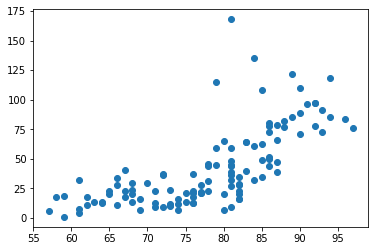

In [8]:
# linear regression을 하기 전에 데이터의 경향성을 확인해보자
# 산점도(scatter)를 이용해서 데이터의 경향성을 확인해보자
plt.scatter(df["Temp"],df["Ozone"])

# linear regression
# 1. training data set 준비
x_data = df["Temp"]  
y_data = df["Ozone"]

# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight와 bias를 정의
W = tf.Variable(tf.random_normal([1]), name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 4. 가설(Hypothesis) 정의
H = W * x + b

# 5. cost function 정의 ( 가설이 맞는지 틀린지 판단하는 기준 )
cost = tf.reduce_mean(tf.square(H-y))

# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00000000001)
train = optimizer.minimize(cost)


# 7. session 초기화 작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 8. 학습
# sess.run(train, feed_dict={x:x_data, y:y_data})

for step in range(3000):
    _,cost_val = sess.run([train,cost],
                            feed_dict={
                                   x : x_data,
                                   y : y_data
                               })
    
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))
        
# 데이터 크기가 커지면 커질수록 난사할 확률이 높아진다 => 정규화를 통해 모든 값을 0과 1 사이에 넣어주자 !!


cost값은 : 0.6452082991600037
cost값은 : 0.02614653669297695
cost값은 : 0.026140311732888222
cost값은 : 0.026140278205275536
cost값은 : 0.026140281930565834
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536


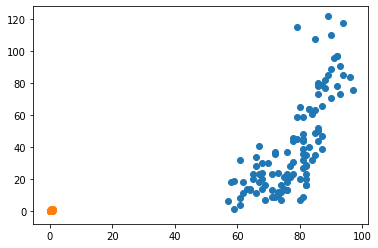

In [42]:
# 정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야한다. 
# => 그래야 학습이 정상적으로 이루어질 수 있다.
# 데이터를 표준화 방식으로 다시 만들어서 학습을 진행

# Normalization(표준화) : 각 데이터를 다음과 같은 방식으로 비율적으로 축소시키는 방식
# 각 요소의 값 => ( 요소값 - 전체데이터의 최소값 ) / ( 전체 데이터의 최대값 - 전체 데이터의 최소값)

# broadcasting된다
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min()) / (df["Ozone"].max()-df["Ozone"].min())

# 확인작업
plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])


# linear regression
# 1. training data set 준비
x_data = df["Temp_Norm"]  
y_data = df["Ozone_Norm"]

# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 3. Weight와 bias를 정의
W = tf.Variable(tf.random_normal([1]), name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 4. 가설(Hypothesis) 정의
H = W * x + b

# 5. cost function 정의 ( 가설이 맞는지 틀린지 판단하는 기준 )
cost = tf.reduce_mean(tf.square(H-y))

# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)


# 7. session 초기화 작업
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 8. 학습
# sess.run(train, feed_dict={x:x_data, y:y_data})

for step in range(3000):
    _,cost_val = sess.run([train,cost],
                            feed_dict={
                                   x : x_data,
                                   y : y_data
                               })
    
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))


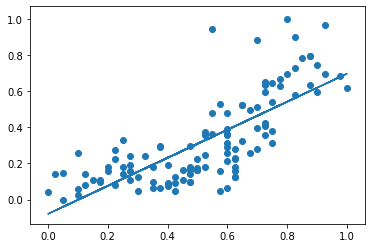

In [40]:
# 학습이 종료된 후 최종적으로 얻은 W와 b의 값을 이용하여 line graph를 산점도와 함께 그려보자
# line graph를 산점도와 함께 그려보자
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
plt.plot(df["Temp_Norm"], df["Temp_Norm"] * sess.run(W) + sess.run(b) )

In [38]:
# 학습이 끝났으니, Prediction 해보자
# 화씨 62도에서 오존량을 예측해보자

# 얘는 normalization된 상태에서 예측하였다
print(sess.run(H, feed_dict = {x : 62}))
# 결과 : [47.97988]

# 다시 원래 데이터로 바꿔주자
tmp = ( 81 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
print(sess.run(H, feed_dict = {x : tmp}))
# 결과 : [0.01807752]

# 위의 결과를 다시 원상복귀시키자
result_norm = sess.run(H, feed_dict = {x : tmp})
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result)

# 결과 : [47.73857]





[47.97988]
[0.38626918]
[47.73857]


cost값은 : 1.9591858386993408
cost값은 : 0.026409557089209557
cost값은 : 0.026141615584492683
cost값은 : 0.026140283793210983
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536
cost값은 : 0.026140278205275536


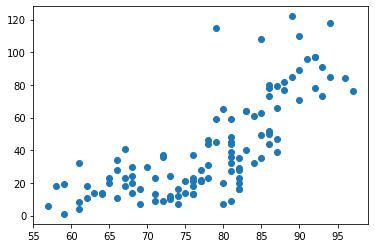

In [29]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@ 12/26 복습 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# 단순선형회귀(simple linear regression)
# 데이터는 온도에 따른 오존량의 측정치를 이용하자
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# scipy 라는 package안에서 stats 모듈을 불러온다
# 결과값만 뽑을 수 있는 모듈 science + python
# scipy 설치하자


# 2. raw data loading and 전처리( Data Pre Processing )
df = pd.read_csv("./DA/ozone.csv")
# 2-1 . 필요한 column 생성
df = df[["Ozone","Temp"]]                  # ( 153,2 )
# 2-2. 결측치 제거
df = df.dropna(how="any", inplace=False)       # ( 116, 2 )
# 2-3. 이상치 제거 (Tuckey Fences 방식 이용 - IRQ기반)
#plt.boxplot(df["Ozone"])
# irq = 3사분위값 - 1사분위값
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq * 1.5
# boolean mask 생성
mask = df["Ozone"] > upper
df = df.loc[~mask]                      # ( 114, 2 )
# 2-4. 데이터가 산점도 관계에 있는지 확인
# scatter 이용해보자
plt.scatter(df["Temp"],df["Ozone"])
# 2-5. 정형화 혹은 표준화를 이용해서 데이터의 scale을 변환
# 정규화(normalization) = (요소값 - 최소값) / (최대값 - 최소값)
# 0 과 1 사이 값으로 scale 된다
# 표준화(standardization) = (요소값 - 평균) / 표준편차
# 일반적으로 정규화 방식 !
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())
# 2-6. data set 설정
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

# 3. placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 4. Weight,bias
W = tf.Variable(tf.random_normal([1]), name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 5. Hypothesis
H = W * x + b

# 6. Cost function
cost = tf.reduce_mean(tf.square(H-y))

# 7. train node 생성
# optimizer 라는 node가 장기적으로 cost값을 줄여나가는 알고리즘 사용
# => GradientDescentOptimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 8. runner 필요
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

# 9. learning
for step in range(3000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             x : x_data,
                             y : y_data
                         })
    if step % 300 == 0:
        print("cost값은 : {}".format(cost_val))
# => 최적의 W와 b를 구했다 !!! 가설 완성 !!!
        
# 10. prediction
tmp = ( 81 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
result_norm = sess.run(H, feed_dict = {x : tmp})
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()

In [33]:
# 위를 scipy로 편하게 처리해보자( )
# 정규화도 할 필요가 없다 !! 왜냐면 linregress 함수가 다 해줄거거든 !!
x = df["Temp"]
y = df["Ozone"]

# 선형회귀로 학습시킨다
result = stats.linregress(x,y)
print(result)
# 결과 : LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
# 위의 H에 있었던 W와 b는 slope, intercept를 말한다!
print(80*result[0] + result[1])
# result[0] = W
# result[1] = b
# x = 80
# H = 80 * W + b =  45.39378577269011

LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
45.39378577269011


In [117]:
## multiple linear regression (다중 선형 회귀)
# 독립변수가 n개인 경우( n = 두개 이상 )
# hypothesis 가 변경
# 단순선형회귀 => H = Wx + b
# 다중선형회귀 => H = w1x1 + w2x2 + w3x3 + b
# 결국 matrix 형태로 W와 x가 표현된다
# H = matmul(X , W) + b

# 퀴즈성적을 이용한 최종시험성적 예측
# 사용하는 데이터
# 퀴즈1 퀴즈2 퀴즈3 최종성적
# 73     80     75    152
# 93     88     93    185
# 89     91     90    180
# 96     98    100    196
# 73     66     70    142

# 80     90     50     ??  (prediction)

# training data set
x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,98,100],
          [73,66,70]]
y_data = [[152],[185],[180],[196],[142]]
# x, w 가 이차원이므로 y도 이차원으로 표현해야한다

# placeholder
# 입력형태가 2차원이므로 shape=[]로 잡아서 2차원임을 알려줘야한다.
# X에 들어가는 x_data의 shape은 5행 3열을 넣어주자 ! 
# X = tf.placeholder(shape = [5,3], dtype = tf.float32)
# 근데 만약에 prediction할 때 1행 3열만 넣고 싶으면???? 어떻게 하지?? (지금 5행3열이란말이야)

# 그래서 
# 행의 개수는 상관하지 않는 None을 사용한다 !!!!!!!
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([3,1]),name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# X와 W는 행렬곱을 하기 때문에 matmul 
H = tf.matmul(X,W) + b

# Cost
cost = tf.reduce_mean(tf.square(H-Y))

# train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00000001)
train = optimizer.minimize(cost)

# runner 필요
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

#  learning
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

# prediction
print(sess.run(H, feed_dict = {X : [[80,90,50], ] }))

cost값은 : 1950.348876953125
cost값은 : 140.96530151367188
cost값은 : 12.02304744720459
cost값은 : 2.8322601318359375
cost값은 : 2.1749675273895264
cost값은 : 2.1258654594421387
cost값은 : 2.120037078857422
cost값은 : 2.1172239780426025
cost값은 : 2.114743709564209
cost값은 : 2.1122846603393555
[[134.83784]]


In [127]:
# 다중선형회귀 연습문제
# 관측은 Solar.R, Wind, Temp에 대한 Ozone량 데이터를 이용하여 Machine learning을 진행하고
# Solar.R : 170, Wind : 7.4, Temp : 67에 대한 Ozone 수치를 예측하세요
# 1. import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# scipy 라는 package안에서 stats 모듈을 불러온다
# 결과값만 뽑을 수 있는 모듈 science + python
# scipy 설치하자


# 2. raw data loading and 전처리( Data Pre Processing )
df = pd.read_csv("./DA/ozone.csv")
# 2-1 . 필요한 column 생성
df = df[["Ozone","Solar.R","Wind","Temp"]]              

# 2-2. 결측치 제거
df = df.dropna(how="any", inplace=False)       

# 2-3. 이상치 제거 : Ozone
#plt.boxplot(df["Ozone"])
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq * 1.5
# boolean mask 생성
mask = df["Ozone"] > upper
df = df.loc[~mask]

# 2-3. 이상치 제거 : Wind                     # (106,4)
#plt.boxplot(df["Wind"])
q_1, q_3 = np.percentile(df["Wind"],[25,75])
irq = q_3 - q_1
up = q_3 + irq * 1.5
mask2 = df["Wind"] > up
df = df.loc[~mask2]

# 2-4. 정규화
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())
df["Wind_Norm"] = (df["Wind"]-df["Wind"].min())/(df["Wind"].max()-df["Wind"].min())
df["Solar.R_Norm"] = (df["Solar.R"]-df["Solar.R"].min())/(df["Solar.R"].max()-df["Solar.R"].min())


#plt.scatter(df["Solar.R_Norm"],df["Ozone_Norm"])


# 2-5. data set 설정
x_data = df[["Solar.R_Norm","Wind_Norm","Temp_Norm"]]
y_data = df[["Ozone_Norm"]]

# 3. placeholder
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# 4. Weight, bias
W = tf.Variable(tf.random_normal([3,1]),name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 5. Hypothesis
# X와 W는 행렬곱을 하기 때문에 matmul 
H = tf.matmul(X,W) + b

# 6. Cost
cost = tf.reduce_mean(tf.square(H-Y))

# 7. train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 8. runner 필요
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

#  9. learning
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

        

# 10. prediction 
solar = ( 170 - df["Solar.R"].min()) / (df["Solar.R"].max() - df["Solar.R"].min())
wind = ( 7.4 - df["Wind"].min()) / (df["Wind"].max() - df["Wind"].min())
temp = ( 67 - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())

tmp = [solar, wind, temp]

result_norm = sess.run(H,feed_dict = {X : [tmp,] })
result = result_norm * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result)

cost값은 : 1.9352848529815674
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
cost값은 : 0.020004302263259888
[[27.976168]]


## 이번엔 sklearn module을 이용해서 학습시키고 예측까지 수행해보자

In [124]:
from sklearn import linear_model
import numpy as np
import pandas as pd

df = pd.read_csv("./DA/ozone.csv")
df = df[["Ozone","Solar.R","Wind","Temp"]]
df = df.dropna(how="any", inplace=False)       

# 2-3. 이상치 제거 : Ozone
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq * 1.5
mask = df["Ozone"] > upper
df = df.loc[~mask]

# 2-3. 이상치 제거 : Wind               
q_1, q_3 = np.percentile(df["Wind"],[25,75])
irq = q_3 - q_1
up = q_3 + irq * 1.5
mask2 = df["Wind"] > up
df = df.loc[~mask2]

# machine learning
X = df[["Solar.R","Wind","Temp"]]
Y = df["Ozone"]

lm = linear_model.LinearRegression()
lm.fit(X,Y)

prediction = lm.predict([[170,7.4,67]])
print("예측값은 : {}".format(prediction))

예측값은 : [27.97594664]


## 다중선형회귀 , 드디어 마지막 !!

In [129]:
# 필요한거 불러오기
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler      # 최소값과 최대값을 갖고 scling을 하는 함수! ( 정 규 화 해 줌)

# 데이터 정제
df = pd.read_csv("./DA/ozone.csv")
df = df.dropna(how="any", inplace = False)
# 이상치 제거 : Ozone
q1,q3 = np.percentile(df["Ozone"],[25,75])
irq = q3 - q1
upper = q3 + irq * 1.5
mask = df["Ozone"] > upper
df = df.loc[~mask]
# 이상치 제거 : Wind               
q_1, q_3 = np.percentile(df["Wind"],[25,75])
irq = q_3 - q_1
up = q_3 + irq * 1.5
mask2 = df["Wind"] > up
df = df.loc[~mask2]

# 데이터 정규화를 할 때 만약에 column 이 50개면 전부 다 입력하면 노동집약적이라서 library 사용하기

# machine learning
x_data = df[["Solar.R","Wind","Temp"]]
x_data = MinMaxScaler().fit_transform(x_data)  # 정규화
y_data = df["Ozone"].values.reshape(-1,1)
y_data = MinMaxScaler().fit_transform(y_data)

In [65]:
# 지도학습
# 1. linear regression (선형회귀) : 단순선형회귀, 다중선형회귀
# 2. logistic regression (binary classification) : 알고리즘 중 가장 보편화되고 정확한 알고리즘
# - email 이 스팸인지 아닌지, 내일주가가 오를지 떨어질지, 신용카드 사용 시 도난카드인지 아닌지를 판별
# - y lable이 0 혹은 1 (False or True)
# - machine learning 의 결과는 확률로 떨어진다
# - 0 ~ 1 사이의 값으로 출력
# - 일반적으로 0.5 이상이면 1로 간주, 0.5 미만이면 0 으로 간주한다.
# - linear regression으로 학습한 후 7시간 공부한 결과를 알아보자

import tensorflow as tf

x_data = [1,2,5,8,9,10]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

H = W * x + b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train= optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict = {x : x_data,
                                     y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

print(sess.run(H, feed_dict={x : 7}))

cost값은 : 28.675039291381836
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
cost값은 : 0.0376470573246479
[0.6564703]


### x에 20을 추가함으로써 결과값이 달라진다 !! 선형회귀의 문제점 !! 그래서 다른 방식의 필요성이 대두되었다.

In [64]:
import tensorflow as tf

x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

H = W * x + b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train= optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict = {x : x_data,
                                     y : y_data})
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

print(sess.run(H, feed_dict={x : 7}))


cost값은 : 4.14890718460083
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
cost값은 : 0.09461325407028198
[0.45856267]


In [ ]:
@@@@@@@@@@@@@@@ 12/27  블로그 정리 @@@@@@@@@@@@@@@@@@@@@@@@

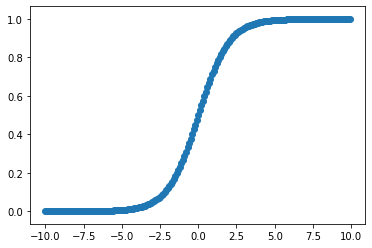

In [4]:
# logistic regression(binary classification)
# 지도학습에서 데이터의 label이 0 혹은 1 로 설정
# 이런 데이터는 기존의 선형회귀방식으로는 학습하고 prediction하는 게 불가능하다
# 이런 데이터는 어떻게 학습하고 예측하면 좋을까?
# 가설을 바꿔보자
# H = XW + b( 다중선형회귀에서 사용한 가설 ) => 직선
# 직선이 아닌 0에서 1 사이의 값을 가지는 함수로 가설을 표현
# sigmoid 함수

# 우선, linear 인지 logistic인지 판단 한 이후, logistic이면 Hypothesis를 sigmoid를 이용해서 새로운 H를 구한다.
# 가설이 변경되었기 때문에 해당 가설을 이용한 cost함수를 이용하면 local minima(minimum)를 찾게 될 수도 있다
# 그렇기 때문에 cost함수를 변경해야한다.
# cost = -ylog(H) - (1-y)log(1-H) => 수학식을 이용해서 cost함수 변경


import matplotlib.pyplot as plt
import numpy as np

# f(x) = 1 / ( 1 + e ** (-x))를 그려보자
x = np.arange(-10,10,0.1)
y = 1 / ( 1 + np.exp(-x))
plt.scatter(x,y)

## 로지스틱 회귀

In [7]:
# 사용할 데이터는
# 공부시간      어학연수기간   시험성적
#    1              1             0(Fail)
#    2              0             0
#    5              1             0
#    2              3             1
#    3              3             1
#    8             1              1
#    10            0              1

import tensorflow as tf

# training data set
x_data = [[1,1],
         [2,0],
         [5,1],
         [2,3],
         [3,3],
         [8,1],
        [10,0]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]

# placeholder
X = tf.placeholder(shape = [None,2], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis 를 sigmoid를 이용해서 곡선으로 표현해야한다.
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)       # sigmoid를 이용해서 곡선으로 표현

# cost function(일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# sess
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

#  learning
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

# predict
result = sess.run(H, feed_dict = {X : [[7,1]]})
print(result)
if result > 0.5:
    print("시험에 통과 : {}".format(result))
else:
    print(" 떨어졌어요 : {} ".format(result))

cost값은 : 1.1665476560592651
cost값은 : 0.11926116794347763
cost값은 : 0.0779542326927185
cost값은 : 0.05762466415762901
cost값은 : 0.04552604630589485
cost값은 : 0.037545450031757355
cost값은 : 0.03190695121884346
cost값은 : 0.027720961719751358
cost값은 : 0.024495022371411324
cost값은 : 0.02193528413772583
[[0.93777937]]
시험에 통과 : [[0.93777937]]


## 로지스틱 회귀 연습문제 ( 틀 렸 다 ! rank 때문에 )

In [29]:
## 대학원 입학시험 예측
# 데이터 공유폴더
# logistic regression을 수행한 후 prediction을 진행 


# 1. module import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


####### data 전처리  #########
df = pd.read_csv("./DA/admission.csv")
print(df.shape) # 400,4

# 결측치 확인 => 없음
df = df.dropna(how="any", inplace = False)
print(df.shape) # 400,4

# 이상치 확인
#plt.boxplot(df["gre"]) #=> 이상치있음
#plt.boxplot(df["gpa"]) #=> 이상치있음

#1 ) gre 이상치 제거
q1,q3 = np.percentile(df["gre"],[25,75])
irq = q3-q1
upper = q3 + irq * 1.5
lower = q1 - irq * 1.5
mask_upper = df["gre"] > upper
mask_lower = df["gre"] < lower

df = df.loc[~(mask_upper | mask_lower)]
print(df.shape)  # 396,4

# 2 ) gpa 이상치 제거

q1,q3 = np.percentile(df["gpa"],[25,75])
irq = q3-q1
upper = q3 + irq * 1.5
lower = q1 - irq * 1.5
mask_upper = df["gpa"] > upper
mask_lower = df["gpa"] < lower

df = df.loc[~(mask_upper | mask_lower)]
print(df.shape)  # 395,4

# 2. data set 설정
x_data = df[["gre","gpa","rank"]]
y_data = df[["admit"]]

# 3. placeholder
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# 4. Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 5. Hypothesis 를 sigmoid를 이용해서 곡선으로 표현해야한다.
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)       # sigmoid를 이용해서 곡선으로 표현

# 6. cost function(일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# 7. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# 8. sess
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

# 9.learning
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

# 10. predict
result = sess.run(H, feed_dict = {X : [[660,3.67,3]]})
print(result)
if result > 0.5:
    print("시험에 통과 : {}".format(1))
else:
    print(" 떨어졌어요 : {} ".format(0))

(400, 4)
(400, 4)
(396, 4)
(395, 4)
cost값은 : 463.0484313964844
cost값은 : 41.134376525878906
cost값은 : 41.042545318603516
cost값은 : 41.02904510498047
cost값은 : 41.072296142578125
cost값은 : 41.155555725097656
cost값은 : 41.38887023925781
cost값은 : 41.56037521362305
cost값은 : 41.73541259765625
cost값은 : 41.9144172668457
[[0.]]
 떨어졌어요 : 0 


## 로지스틱 회귀 연습문제 강사님용

In [62]:
# 정확도를 측정해보자(accuracy) => 95% 이상, 98% 이상이어야 실생활에서 사용할 수 있다.
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# 1. data loading
df = pd.read_csv("./DA/admission.csv")
#print(df.corr())

# 경향성을 봤더니 rank가 음의 경향을 가진다 => 그래서 rank의 방향을 바꿔주어야한다!! 
# 1등급이 제일 높은 등급인데 숫자가 작으니 음의 관계를 가진다.
# 그래서 rank를 역순으로 돌려야 한다 !
# df이용해보자

# lambda 식을 사용하여 특정 값을 하나씩 불러와서 함수를 실행시키자 !
def change_rank(k):
    if k == 4:
        return 1
    elif k == 3:
        return 2
    elif k == 2:
        return 3
    else:
        return 4

df["rank"] = df["rank"].apply(lambda x : change_rank(x))

# rank 변경 전
#    admit  gre   gpa  rank
# 0      0  380  3.61     3
# 1      1  660  3.67     3
# 2      1  800  4.00     1
# 3      1  640  3.19     4
# 4      0  520  2.93     4

# rank 변경 후
#    admit  gre   gpa  rank
# 0      0  380  3.61     2
# 1      1  660  3.67     2
# 2      1  800  4.00     4
# 3      1  640  3.19     1
# 4      0  520  2.93     1


# 결측치 처리
# 결측치 있는지 확인 => 없음
# print(df.isnull().sum()) 
# 결과 : 
# admit    0
# gre      0
# gpa      0
# rank     0
# dtype: int64

# 이상치 처리

def process_outlier(tmp_df, tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    irq = q3-q1
    upper = q3 + irq * 1.5
    lower = q1 - irq * 1.5
    mask_upper = tmp > upper
    mask_lower = tmp < lower

    tmp_df = tmp_df.loc[~(mask_upper | mask_lower)]
    return tmp_df

df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])

# machine learning
x_data = df[["gre","gpa","rank"]].values  # numpy array
x_data = MinMaxScaler().fit_transform(x_data)
#print(x_data)
# y 는 두 개의 값 밖에 없기 때문에 굳이 scling할 필요 없다. 그래서 type만 맞춰주자
y_data = df["admit"].values.reshape(-1,1)

# placeholder
X = tf.placeholder(shape = [None,3], dtype = tf.float32)
Y = tf.placeholder(shape = [None,1], dtype = tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([3,1]), name = "Weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
# 0과 1로 수렴하는 s자 모양의 곡선을 우리의 가설로 지정한다.
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# cost 
### 이거 무슨 함수??
### 안쓰면 로그로 수식을 써야함
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))
# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 그래프 초기화

# 9.learning
for step in range(30000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={
                             X : x_data,
                             Y : y_data
                         })
    if step % 3000 == 0:
        print("cost값은 : {}".format(cost_val))

######################################################### 학습 종료 ########################################################

# 정확도를 측정해보자(Accuracy)
# 학습용 data set이 있고, 테스트용 data set이 있다.
# 현재  :  test data set이 없다. 
# 우선, train data set을 test data set으로 사용하자
# 원래 이렇게 하면 안된다 ! 왜냐면 컴퓨터가 학습을 이미 했기 때문에 결과는 좋게 나오니까 !

# predict한 결과를 알아오자
# H를 가지고 예측을 할건데 logistic이므로 0과 1 사이의 실수가 나온다 
# result = H > 0.5 일 때 결과는 True, False값으로 나온다.
# 그래서 test행 시킨다?
# 나오는 값을 모두 1과 0으로 바꾼다
# 그래서 특정한 x입력에 대해서 predict는 0과 1로 이루어진 예측값이다.
# cast : 논리값을 실수값으로 바꾸는것
predict = tf.cast( H > 0.5, dtype = tf.float32)

# 예측값과 주어진 데이터의 값이 같으면 True, 아니면 False
correct = tf.equal(predict,Y) # True, False로 나온다

# True False로 나온 값을 1, 0으로 바꿨을 때 이를 평균으로 내고, 이 값이 얼마나 정확한지 알 수 있다.
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                 feed_dict = {X: x_data,
                                              Y: y_data})))
# 결과 : 정확도 : 0.703797459602356
# 사용할 수 없는 모델.

cost값은 : 0.9979813098907471
cost값은 : 0.5767008662223816
cost값은 : 0.5760597586631775
cost값은 : 0.5760522484779358
cost값은 : 0.576052188873291
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
cost값은 : 0.5760520696640015
정확도 : 0.703797459602356
